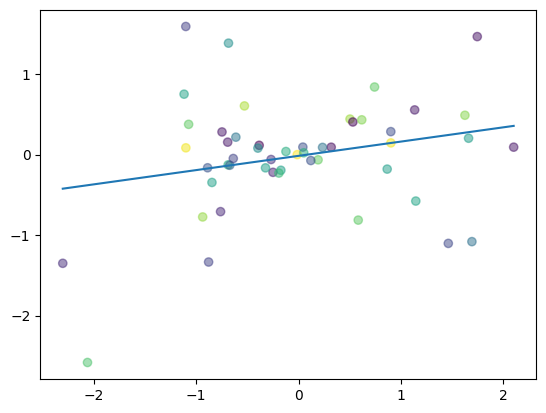

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#creating 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x*np.random.randn(n)

#creates numbers dots with different colours
colors = np.random.rand(n)

#Plot best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

#plot the random x and y data points
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [8]:
#building the toy dataset
x_values = [i for i in range(11)]

#convert to numpy array
x_train = np.array(x_values, dtype=np.float32)

#convert it to 2-dimensional array
x_train = x_train.reshape(-1, 1)


# y = 2x + 1
y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

(11, 1)

In [9]:
#building the model
import torch
import torch.nn as nn


class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out
        

In [10]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [17]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100

for epoch in range(epochs):
    epoch += 1
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    #clear the gradient w.r.t parametere
    optimizer.zero_grad()

    # Forward to get output
    outputs = model(inputs)

    #calculate the loss
    loss = criterion(outputs, labels)

    #Getting gradients w.r.t parameters
    loss.backward()

    #upadating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 0.01148061454296112
epoch 2, loss 0.011352408677339554
epoch 3, loss 0.011225619353353977
epoch 4, loss 0.011100295931100845
epoch 5, loss 0.010976285673677921
epoch 6, loss 0.01085375715047121
epoch 7, loss 0.010732538066804409
epoch 8, loss 0.010612686164677143
epoch 9, loss 0.010494165122509003
epoch 10, loss 0.010377013124525547
epoch 11, loss 0.01026106532663107
epoch 12, loss 0.01014653965830803
epoch 13, loss 0.010033226571977139
epoch 14, loss 0.009921160526573658
epoch 15, loss 0.009810400195419788
epoch 16, loss 0.00970083475112915
epoch 17, loss 0.009592522867023945
epoch 18, loss 0.009485442191362381
epoch 19, loss 0.009379458613693714
epoch 20, loss 0.00927471648901701
epoch 21, loss 0.009171156212687492
epoch 22, loss 0.009068761020898819
epoch 23, loss 0.00896748062223196
epoch 24, loss 0.00886733178049326
epoch 25, loss 0.008768327534198761
epoch 26, loss 0.00867040827870369
epoch 27, loss 0.008573629893362522
epoch 28, loss 0.008477873168885708
epoch 29, 

In [18]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.88567734],
       [ 2.9021409 ],
       [ 4.9186044 ],
       [ 6.935068  ],
       [ 8.951531  ],
       [10.967995  ],
       [12.984459  ],
       [15.000922  ],
       [17.017385  ],
       [19.03385   ],
       [21.050312  ]], dtype=float32)

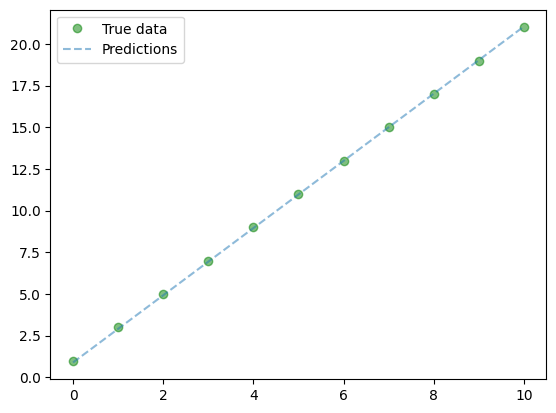

In [19]:
# Plot of predicted and actual values

# clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

#plot true data
plt.plot(x_train, y_train, 'go', label = 'True data', alpha=0.5)

#plot predicitions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

#legent and plot
plt.legend(loc='best')
plt.show()